In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1 = df[['Survived','Pclass','Sex','Age','Fare']]
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [7]:
Sex_le = LabelEncoder()

In [8]:
df1['Sex']=Sex_le.fit_transform(df1['Sex'])

C:\Users\abdul\AppData\Local\Temp\ipykernel_2036\3055514247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex']=Sex_le.fit_transform(df1['Sex'])


In [9]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [10]:
X =df1.drop('Survived',axis='columns')
X

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [11]:
y = df1['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

[Text(0.2941500756048387, 0.9761904761904762, 'x[1] <= 0.5\ngini = 0.471\nsamples = 668\nvalue = [415, 253]'),
 Text(0.12172379032258064, 0.9285714285714286, 'x[0] <= 2.5\ngini = 0.383\nsamples = 229\nvalue = [59, 170]'),
 Text(0.03225806451612903, 0.8809523809523809, 'x[2] <= 2.5\ngini = 0.064\nsamples = 120\nvalue = [4, 116]'),
 Text(0.016129032258064516, 0.8333333333333334, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008064516129032258, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.024193548387096774, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04838709677419355, 0.8333333333333334, 'x[2] <= 24.5\ngini = 0.05\nsamples = 118\nvalue = [3, 115]'),
 Text(0.04032258064516129, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.056451612903225805, 0.7857142857142857, 'x[2] <= 26.0\ngini = 0.072\nsamples = 80\nvalue = [3, 77]'),
 Text(0.04838709677419355, 0.7380952380952381, 'gini = 0.0\nsample

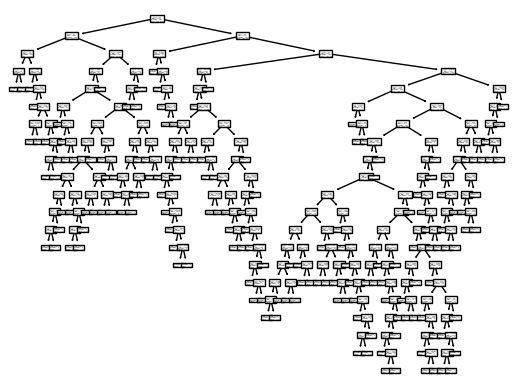

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
tree.plot_tree(model)

In [14]:
model.score(X_test,y_test)

0.7399103139013453

In [15]:
model.predict([[3,1,22.000000,7.2500]])

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64